In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [54]:
load_df = pd.read_csv("preprocessed_dataset.csv")
load_df.head(2)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,11,0,10,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,16,0,11,0,0,...,0,0,1,0,0,1,0,0,0,0


In [55]:
from sklearn.utils import resample

df_class_1 = load_df[load_df['SEVERITYCODE'] == 1]
df_class_2 = load_df[load_df['SEVERITYCODE'] == 2]

df_class_1_downsample = resample(df_class_1, replace = False, n_samples= 57146, random_state = 42)

df_downsample = pd.concat([df_class_1_downsample, df_class_2])
df_downsample['SEVERITYCODE'].value_counts()

2    57146
1    57146
Name: SEVERITYCODE, dtype: int64

In [56]:
df = df_downsample

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x = df.iloc[:, 1:]
y = df.iloc[:, :1]

x = preprocessing.StandardScaler().fit(x).transform(x)

In [57]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print ('x_train shape: {},  y_train shape: {}'.format(x_train.shape,  y_train.shape))
print ('x_test shape: {},  y_test shape: {}'.format(x_test.shape,  y_test.shape))

x_train shape: (91433, 54),  y_train shape: (91433, 1)
x_test shape: (22859, 54),  y_test shape: (22859, 1)


In [45]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1, 'max_depth': 5, 'alpha': 10}
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

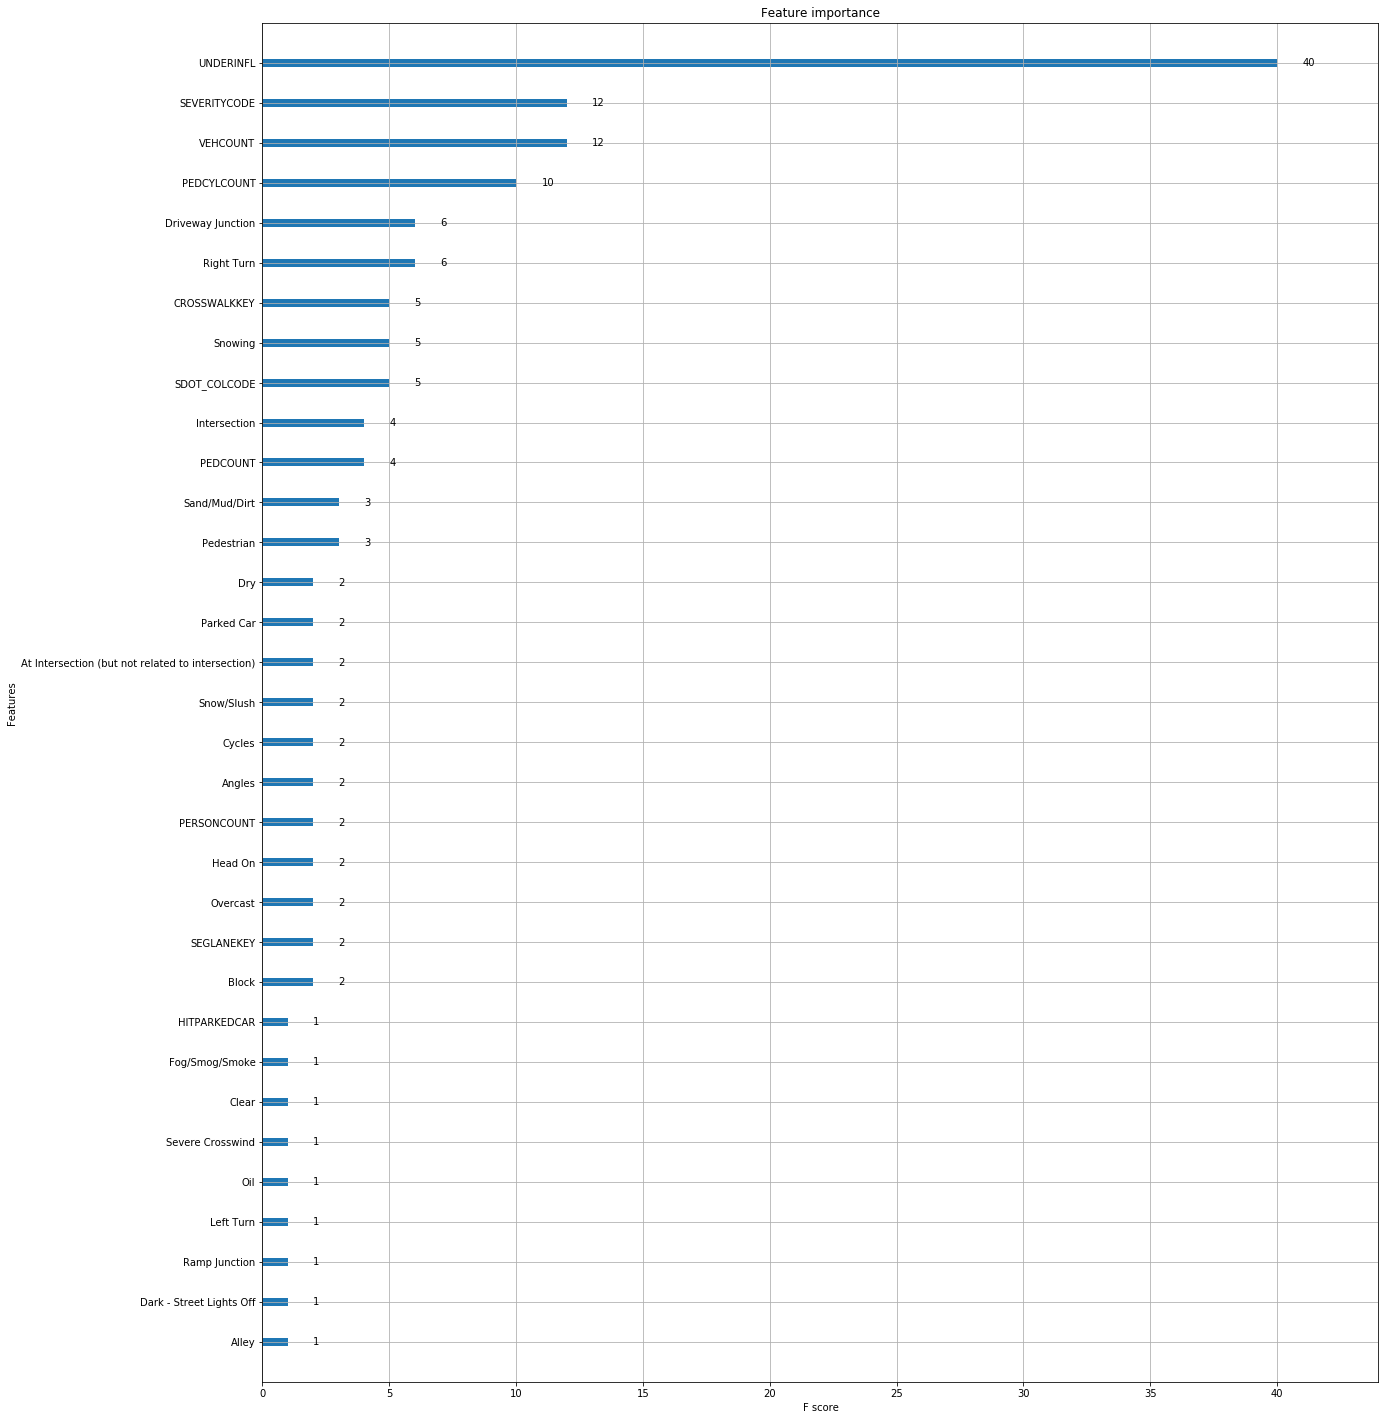

In [46]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 25]
axsub = xgb.plot_importance(xg_reg)

# get the original names back
Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(df.columns))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
# print(dict_features)
plt.show()

In [58]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

In [60]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
45,0.422599,0.000477,0.423404,0.000702
46,0.422506,0.000470,0.423335,0.000706
47,0.422403,0.000488,0.423240,0.000690
48,0.422296,0.000502,0.423159,0.000687
49,0.422213,0.000535,0.423096,0.000658
